In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

### Data Exploration

The data set consists of the expression levels of 77 proteins / protein modifications that produced detectable signals in the nuclear fraction of cortex.

Total of 72 mice:

    . 38 control mice
    
    . 34 trisomic mice (Down Syndrome)

In [75]:
# 77 proteins / protein modifications --> produced detectable signals in the nuclear fraction of cortex.

df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [76]:
# 15 measurements were registered of each protein per sample / mouse
# 38 control mice x 15 = 570 measurements
# 34 control mice x 15 = 510 measurements
# Total = 1080 measurements per protein
# Each measurement can be considered as independent sample/mouse

df.head(15)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [77]:
# 8 classes of mice based on features such as genotype, behavior and treatmenr

df['class'].unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

### Data Preprocessing

In [78]:
# Impute the missing values using the rown mean

proteins = df.columns[1:78]
proteins_df = df[proteins]
proteins_df = proteins_df.T
proteins_df

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
DYRK1A_N,0.503644,0.514617,0.509183,0.442107,0.434940,0.447506,0.428033,0.416923,0.386311,0.380827,...,0.355136,0.318448,0.333438,0.280946,0.230977,0.254860,0.272198,0.228700,0.221242,0.302626
ITSN1_N,0.747193,0.689064,0.730247,0.617076,0.617430,0.628176,0.573696,0.564036,0.538428,0.499294,...,0.588026,0.509701,0.514353,0.528821,0.423589,0.463591,0.474163,0.395179,0.412894,0.461059
BDNF_N,0.430175,0.411770,0.418309,0.358626,0.358802,0.367388,0.342709,0.327703,0.317720,0.362462,...,0.314915,0.290576,0.316404,0.299645,0.254439,0.254860,0.251638,0.234118,0.243974,0.256564
NR1_N,2.816329,2.789514,2.687201,2.466947,2.365785,2.385939,2.334224,2.260135,2.125725,2.096266,...,2.544507,2.314752,2.317035,2.290991,1.868897,2.092082,2.161390,1.733184,1.876347,2.092790
NR2A_N,5.990152,5.685038,5.622059,4.979503,4.718679,4.807635,4.473130,4.268735,4.063950,3.598587,...,3.981010,3.041115,3.451893,3.243548,2.447210,2.600035,2.801492,2.220852,2.384088,2.594348
pAKT_N,0.218830,0.211636,0.209011,0.222886,0.213106,0.218578,0.225173,0.214834,0.207222,0.227649,...,0.224713,0.229135,0.235962,0.246021,0.209734,0.211736,0.251274,0.220665,0.208897,0.251001
pBRAF_N,0.177565,0.172817,0.175722,0.176463,0.173627,0.176233,0.184004,0.179668,0.167778,0.188093,...,0.178030,0.175855,0.201262,0.195797,0.150761,0.171262,0.182496,0.161435,0.173623,0.191811
pCAMKII_N,2.373744,2.292150,2.283337,2.152301,2.134014,2.141282,2.012414,2.007985,1.861514,1.717861,...,3.326520,2.881429,2.955047,2.946067,2.184052,2.483740,2.512737,1.989723,2.086028,2.361816
pCREB_N,0.232224,0.226972,0.230247,0.207004,0.192158,0.195188,0.195789,0.189803,0.180684,0.188093,...,0.241857,0.206036,0.215457,0.221759,0.187381,0.207317,0.216339,0.185164,0.192044,0.223632
pELK_N,1.750936,1.596377,1.561316,1.595086,1.504230,1.442398,1.612036,1.424601,1.261891,1.414329,...,1.236318,1.088389,1.118612,1.141400,0.949746,1.057971,1.081150,0.884342,0.922595,1.064085


In [79]:
# null_data = proteins_df[proteins_df.isnull().any(axis=1)]
# null_data.iloc[0]

In [80]:
proteins_df = proteins_df.fillna(proteins_df.mean())
proteins_df.T.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.760020,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.734444,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.737872,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.685216,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.674092,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [81]:
df[proteins] = proteins_df.T
df[df.isnull().any(axis=1)]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class


### K-Means Preparation

**Clustering** : Grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. 

The algorithm will help you to tackle unlabeled datasets (i.e. the datasets that do not have any class-labels) and draw your own inferences from them with ease.

**Hard clustering** : in hard clustering, each data object or point either belongs to a cluster completely or not. **Clusters do not overlap**

**K-Means** : falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. 

**K-Means algorithm** : k-means algorithm will find the nearest cluster center for each data point and assign the data point closest to that cluster.

    1) K-Means starts by randomly defining k centroids.
    
    2) Assign each data point to the closest corresponding centroid, using the standard Euclidean distance
    
    3) For each centroid, calculate the mean of the values of all the points belonging to it.
    
    4) The mean value becomes the new value of the centroid.
    
    
Once all data points have been assigned to clusters, the cluster centers will be recomputed

new cluster centers will emerge from the average of the values of the cluster data points

This process is repeated until most data points stick to the same cluster

<img src="img/kmeans1.png">

In [82]:
# Converting the 8 categorical classes from text to type Category
df['class'] = df['class'].astype('category')

# y = np.array(df['class'])
y = np.array(df['class'].cat.codes)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [83]:
import sys
np.set_printoptions(threshold=sys.maxsize)


In [84]:
# For simplification you can assume the covariances are 0 and equal variance of 1 normalizing the input variables

protein_columns = df.columns[1:78]
X = df[protein_columns]
# print(X)

X_normalized = normalize(X, norm='l2')
# print(X_normalized)

kmeans = KMeans(n_clusters=8)
kmeans.fit(X_normalized)
y_pred = kmeans.predict(X_normalized)


In [85]:
# Predicted Clusters 
y_pred

array([6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 0, 0, 0, 0, 0, 0, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4,
       4, 4, 4, 6, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 7,

In [86]:
# An implementation of the RAND INDEX SCORE 

from scipy.special import comb

def rand_index_score(pred, actual):
    tp_plus_fp = comb(np.bincount(pred), 2).sum()
    tp_plus_fn = comb(np.bincount(actual), 2).sum()
    A = np.c_[(pred, actual)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(pred))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

kmeans_RI = rand_index_score(y_pred, y)
print(kmeans_RI)

0.8408677444822024


In [87]:
# Another implementation of the RAND INDEX SCORE 

from itertools import combinations

def rand_score(actual, pred):
    #create list of all combinations with the length of labels.
    my_pair = list(combinations(range(len(actual)), 2))
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((actual[my_pair[i][0]],actual[my_pair[i][1]])) == is_equal((pred[my_pair[i][0]],pred[my_pair[i][1]])) 
               and is_equal((pred[my_pair[i][0]],pred[my_pair[i][1]])) == True):
                my_a += 1
                
            if(is_equal((actual[my_pair[i][0]],actual[my_pair[i][1]])) == is_equal((pred[my_pair[i][0]],pred[my_pair[i][1]])) 
               and is_equal((pred[my_pair[i][0]],pred[my_pair[i][1]])) == False):
                my_b += 1
                
    denominator = comb(len(actual),2)
    
    ri = (my_a + my_b) / denominator
    
    return ri

rand_score(y, y_pred)

0.8408677444822024

**Adjusted Rand Index**

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

In [88]:
kmeans_ARI = adjusted_rand_score(y, y_pred) 
print(kmeans_ARI)

0.298300979092069


In [89]:
class K_Means:
    def __init__(self, k=8, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    
new_X = X.iloc[ : , [0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14] ].values


clf = K_Means()
clf.fit(new_X)

correct = 0

for i in range(len(new_X)):

    predict_me = np.array(new_X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1

print(correct/len(X))

# print(new_X)

0.1175925925925926


### Expectation Maximization

 EM can be simplified in 2 phases: The E (expectation) and M (maximization) steps.
 
 #### Expectation Step


 **1)  GUESS THE PARAMETER VALUES (MEAN AND STANDARD DEVIATION) **

We start with a bunch of points (xᵢ), we don't have any labels for them.

The only thing we know is that they came from two Gaussians.

We want to discover what these **two Gaussians are** automatically.

We start by placing two Gaussians in random positions (same variance, different means).


 <img src="img/gaussian1.png"> 
 
  <img src="img/gaussian2.png"> 

 **2)  COMPUTE THE LIKELIHOOD OF EACH DATA POINT APPEARING UNDER THE CURRENT GUESSES **
 
We calculate the **likelihood** of each observation xᵢ using the estimated parameters.
 
 **How likely is each of the points to come from the yellow or from the blue**
 For each one of these points we are asking a question, does it look more like a sample from the yellow Gaussian or a sample from the blue Gaussian. 

We putting each point into the **Probability Density Function (PDF)** for a normal distribution using current guesses. This tells us with our current guesses a data is **much more likely to be red** (0.189) than blue (0.000003)
 
<img src="img/gaussian.png"> 


 **3)  TURN THESE TWO LIKELIHOOD VALUES INTO WEIGHTS SO THEY SUM TO 1 **
 
 **Weight** --> The probabiliy it was drawn fomr the color's distribution
 
 Red weight = likelihood of red / likelihood Total
 
 Blue weight = likelihood of blue / likelihood Total
 


<img src="img/posterior.png"> 

 #### Maximization Step
 
  With those weights we compute **New** Estimates for the mean and standard deviation of red and blue groups.
 
 The greater the weight if a color on a data point, the more the data point influences the next estimates for that color's parameters. This has the effect of **pulling** the parameters in the right direction.

for each cluster / Gaussian , we update the mean (μₖ), variance (σ₂²), and the scaling parameters Φₖ. To update the mean, note that we weight each observation using the conditional probabilities bₖ.

We may repeat these steps until converge.

<img src="img/parameter.png"> 
<img src="img/gaussian2.png"> 
  <img src="img/gaussian3.png"> 
<img src="img/gaussian4.png">   




In [90]:
# For simplification you can assume the covariances are 0 and equal variance of 1 normalizing the input variables

protein_columns = df.columns[1:78]
X = df[protein_columns]
# print(X)

X_normalized = normalize(X, norm='l2')
# print(X_normalized)



C:\Users\vmc62\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vmc62\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


iteration 1, shift 1.3590031064860153
iteration 2, shift 0.9726778769397635
iteration 3, shift 2.754191873016219
iteration 4, shift 1.365866915408957
iteration 5, shift 0.4067086509630638
iteration 6, shift 0.2008944032587509
iteration 7, shift 0.05629996492982667
iteration 8, shift 0.0


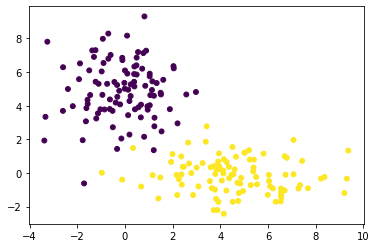

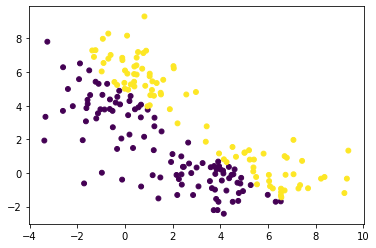

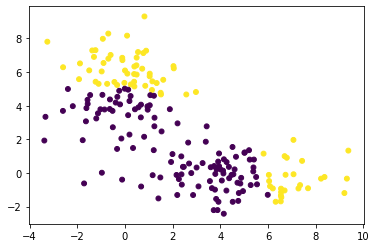

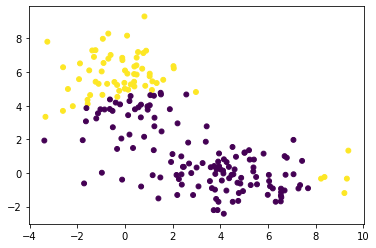

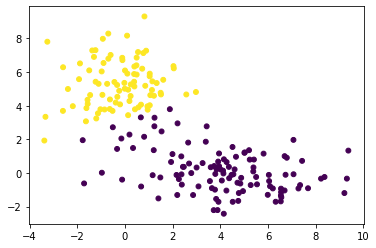

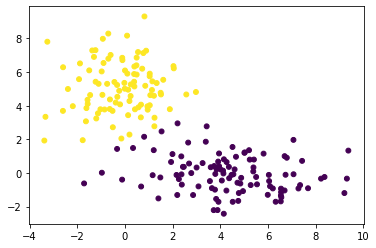

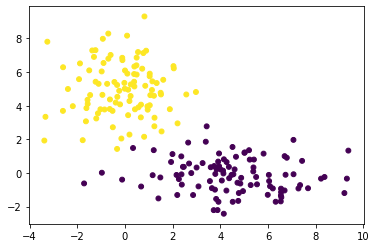

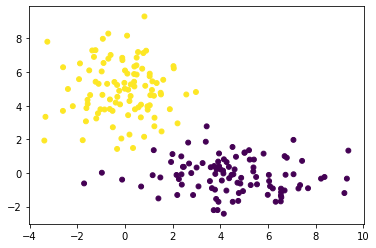

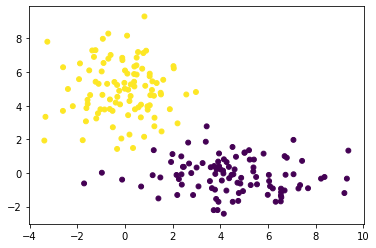

In [91]:
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm

# Creating initial Gaussian clusters parameters

mu1 = [0, 5]
sig1 = [ [2, 0], [0, 3] ]

mu2 = [5, 0]
sig2 = [ [4, 0], [0, 1] ]

# Generating Random samples based on initial parameters
x1, y1 = np.random.multivariate_normal(mu1, sig1, 100).T
x2, y2 = np.random.multivariate_normal(mu2, sig2, 100).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))

labels = ([1] * 100) + ([2] * 100)

data = {'x': xs, 'y': ys, 'label': labels}

df = pd.DataFrame(data=data)

# Creating Scatter plot
fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])

### 
#Expectation-maximization Starts
###

# Initial guesses for parameters
guess = { 'mu1': [1,1],
          'sig1': [ [1, 0], [0, 1] ],
          'mu2': [4,4],
          'sig2': [ [1, 0], [0, 1] ],
          'lambda': [0.4, 0.6]
        }

# Calculating the PDF (Probability Density Function
# based on the guessed parameters
def prob(val, mu, sig, lam):
  p = lam
  for i in range(len(val)):
    p *= norm.pdf(val[i], mu[i], sig[i][i])
  return p


# assign every data using Likelihood
def expectation(dataFrame, parameters):
    
  for i in range(dataFrame.shape[0]):
    
    x = dataFrame['x'][i]
    y = dataFrame['y'][i]
    
    p_cluster1 = prob([x, y], list(parameters['mu1']), list(parameters['sig1']), parameters['lambda'][0] )
    
    p_cluster2 = prob([x, y], list(parameters['mu2']), list(parameters['sig2']), parameters['lambda'][1] )
    
    if p_cluster1 > p_cluster2:
      dataFrame['label'][i] = 1
    else:
      dataFrame['label'][i] = 2
  return dataFrame


# update estimates of Parameters

def maximization(dataFrame, parameters):
    
  points_assigned_to_cluster1 = dataFrame[dataFrame['label'] == 1]
  points_assigned_to_cluster2 = dataFrame[dataFrame['label'] == 2]
    
  percent_assigned_to_cluster1 = len(points_assigned_to_cluster1) / float(len(dataFrame))

  percent_assigned_to_cluster2 = 1 - percent_assigned_to_cluster1
    
  parameters['lambda'] = [percent_assigned_to_cluster1, percent_assigned_to_cluster2 ]

  parameters['mu1'] = [points_assigned_to_cluster1['x'].mean(), points_assigned_to_cluster1['y'].mean()]
    
  parameters['mu2'] = [points_assigned_to_cluster2['x'].mean(), points_assigned_to_cluster2['y'].mean()]

  parameters['sig1'] = [ [points_assigned_to_cluster1['x'].std(), 0 ], [ 0, points_assigned_to_cluster1['y'].std() ] ]
    
  parameters['sig2'] = [ [points_assigned_to_cluster2['x'].std(), 0 ], [ 0, points_assigned_to_cluster2['y'].std() ] ]

  return parameters

# Find of parameters have converged
# by calculating the distance between points

def distance(old_params, new_params):
  dist = 0
  for param in ['mu1', 'mu2']:
    for i in range(len(old_params)):
      dist += (old_params[param][i] - new_params[param][i]) ** 2
  return dist ** 0.5

# loop until parameters converge
shift = sys.maxsize
epsilon = 0.01
iters = 0
df_copy = df.copy()

# randomly assign points to their initial clusters
df_copy['label'] = map(lambda x: x+1, np.random.choice(2, len(df)))

params = pd.DataFrame(guess)

while shift > epsilon:
  iters += 1

  # E-step
  updated_labels = expectation(df_copy.copy(), params)

  # M-step
  updated_parameters = maximization(updated_labels, params.copy())

  # see if our estimates of mu have changed
  # could incorporate all params, or overall log-likelihood
  shift = distance(params, updated_parameters)

  # logging
  print("iteration {}, shift {}".format(iters, shift))

  # update labels and params for the next iteration
  df_copy = updated_labels
  params = updated_parameters

  fig = plt.figure()
  plt.scatter(df_copy['x'], df_copy['y'], 24, c=df_copy['label'])



In [92]:
# Applying Expectation Maximization

em = GaussianMixture(n_components=8)
em.fit(X_normalized)
y_pred = em.predict(X_normalized)

# Calculating the Rand Index

em_RI = rand_index_score(y, y_pred)

print(em_RI)

0.8468660968660968


In [93]:
# Calculating the Adjusted Rand Index

em_ARI = adjusted_rand_score(y, y_pred) 
print(em_ARI)

0.32503032599686826


## Presenting Results

In [94]:
# Summarizing Results for both Algorithms

print("\nKmeans Algorithm Rand Index = ", round(kmeans_RI, 2))
print("\nKmeans Algorithm Adjusted Rand Index = ", round(kmeans_ARI, 2))
print("\nExpectation Maximization Algorithm Rand Index = ", round(em_RI, 2))
print("\nExpectation Maximization Adjusted Rand Index = ", round(em_ARI,2))


Kmeans Algorithm Rand Index =  0.84

Kmeans Algorithm Adjusted Rand Index =  0.3

Expectation Maximization Algorithm Rand Index =  0.85

Expectation Maximization Adjusted Rand Index =  0.33


### Final Questions

What is the best value of **k** in terms of RAND index and Adjusted RAND index?

Answer:  8

Which Algorithm performs better and why?

Answer:  


